In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ot

# for 3d plot
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.collections import PolyCollection

In [18]:
n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a1 = ot.datasets.make_1D_gauss(n, m=20, s=5)  # m= mean, s= std
a2 = 0.5*ot.datasets.make_1D_gauss(n, m=60, s=8) + 0.5*ot.datasets.make_1D_gauss(n, m=80, s=10)

In [19]:
# creating matrix A containing all distributions
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()

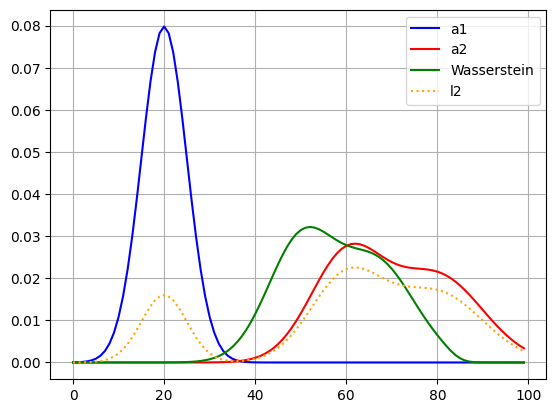

In [23]:
alpha = 0.8  # 0<=alpha<=1
weights = np.array([1 - alpha, alpha])

# l2bary
bary_l2 = A.dot(weights)

# wasserstein
reg = 1e-3
bary_wass = ot.bregman.barycenter(A, M, reg, weights)

# Affichage
plt.plot(x, a1, label='a1', color='blue')
plt.plot(x, a2, label='a2', color='red')
plt.plot(x, bary_wass, label='Wasserstein', color='green')
plt.plot(x, bary_l2, label='l2', color='orange', linestyle=':')

plt.legend()
plt.grid(True)
plt.show()